In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from IPython.core.display import display, HTML
import re
import dateutil.parser
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import svm
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
def Action(item):
    if 'Action' in item:
        return 1
    else:
        return 0
    
def Adventure(item):
    if 'Adventure' in item:
        return 1
    else:
        return 0
    
def Animation(item):
    if 'Animation' in item:
        return 1
    else:
        return 0
    
def Biography(item):
    if 'Biography' in item:
        return 1
    else:
        return 0
    
def Comedy(item):
    if 'Comedy' in item:
        return 1
    else:
        return 0
    
def Crime(item):
    if 'Crime' in item:
        return 1
    else:
        return 0
    
def Documentary(item):
    if 'Documentary' in item:
        return 1
    else:
        return 0
    
def Drama(item):
    if 'Drama' in item:
        return 1
    else:
        return 0
    
def Family(item):
    if 'Family' in item:
        return 1
    else:
        return 0
    
def Fantasy(item):
    if 'Fantasy' in item:
        return 1
    else:
        return 0
    
def History(item):
    if 'History' in item:
        return 1
    else:
        return 0    
    
def Horror(item):
    if 'Horror' in item:
        return 1
    else:
        return 0
    
def Music(item):
    if 'Music' in item:
        return 1
    else:
        return 0
    
def Music(item):
    if 'Music' in item:
        return 1
    else:
        return 0
    
def Musical(item):
    if 'Musical' in item:
        return 1
    else:
        return 0
    
def Mystery(item):
    if 'Mystery' in item:
        return 1
    else:
        return 0
    
def News(item):
    if 'News' in item:
        return 1
    else:
        return 0
    
def Romance(item):
    if 'Romance' in item:
        return 1
    else:
        return 0
    
def SciFi(item):
    if 'Sci-Fi' in item:
        return 1
    else:
        return 0

def Short(item):
    if 'Short' in item:
        return 1
    else:
        return 0
    
def Sport(item):
    if 'Sport' in item:
        return 1
    else:
        return 0
    
def Thriller(item):
    if 'Thriller' in item:
        return 1
    else:
        return 0

def War(item):
    if 'War' in item:
        return 1
    else:
        return 0
    
def Western(item):
    if 'Western' in item:
        return 1
    else:
        return 0


In [3]:
def Winter(item):
    if 0 < item < 4:
        return 1
    else:
        return 0
    
def Spring(item):
    if 3 < item < 7:
        return 1
    else:
        return 0    
    
def Summer(item):
    if 6 < item < 10:
        return 1
    else:
        return 0    

In [4]:
def money_to_int(moneystring):
    try:
        moneystring = moneystring.replace('$', '').replace(',', '')
        return int(moneystring)
    except :
        pass

In [5]:
def find_between(s):
    first = '>'
    try:
        start = s.index( first ) + len( first )
        end = -4
        return s[start:end]
    except ValueError:
        return ""

In [6]:
dfBase = pd.read_pickle('Full15yr.pkl')

In [186]:
dfBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11268 entries, 0 to 11267
Data columns (total 8 columns):
Movie_Title             11268 non-null object
Distributor             11268 non-null object
Domestic_Total_Gross    11268 non-null object
Budget                  2260 non-null object
Runtime(mins)           10864 non-null object
Rating                  6036 non-null object
Release_Date            11268 non-null datetime64[ns]
Genre                   11268 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 704.4+ KB


In [7]:
dfBudget = pd.read_csv('Budgets5500.csv')

In [187]:
dfBudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 2 columns):
BudgetsN       5500 non-null int64
Movie_Title    5500 non-null object
dtypes: int64(1), object(1)
memory usage: 86.1+ KB


In [8]:
dfBudget['Movie_Title'] = dfBudget['Movie_Titles'].apply(find_between)
dfBudget['Budget'] = dfBudget['Budget'].apply(money_to_int)
dfBudget.rename(columns={"Budget": "BudgetsN"},inplace=True)
dfBudget.drop('Movie_Titles',axis = 1, inplace = True)
dfBudget.drop('Unnamed: 0',axis = 1, inplace = True)

In [9]:
dfBudget.rename(columns={"Budget": "BudgetsN"},inplace=True)
dfBudget.head()

,BudgetsN,Movie_Title
0,400000000,Avengers: Endgame
1,379000000,Pirates of the Caribbean: On Stranger Tides
2,365000000,Avengers: Age of Ultron
3,306000000,Star Wars Ep. VII: The Force Awakens
4,300000000,Avengers: Infinity War


In [10]:
df = dfBase.merge(dfBudget,'left')

In [11]:
df['strpdate'] = pd.to_datetime(df.Release_Date, format = "%Y-%M-%D")
df['Year'] = pd.DatetimeIndex(df['strpdate']).year
df['Budget'] = pd.to_numeric(df['Budget'],errors='coerce')
df['Domestic_Total_Gross'] = pd.to_numeric(df['Domestic_Total_Gross'],errors='coerce')
df['Runtime(mins)'] = pd.to_numeric(df['Runtime(mins)'],errors='coerce')



In [12]:
df.Budget.fillna(df.BudgetsN, inplace=True)
df.drop('BudgetsN',axis = 1, inplace = True)

In [286]:
#df.groupby(['Year']).Movie_Title.count()

Year
1998      9
1999     19
2001      5
2002     27
2003      6
2004    107
2005    656
2006    717
2007    719
2008    698
2009    617
2010    664
2011    714
2012    791
2013    775
2014    813
2015    766
2016    806
2017    799
2018    910
2019    742
Name: Movie_Title, dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11360 entries, 0 to 11359
Data columns (total 10 columns):
Movie_Title             11360 non-null object
Distributor             11360 non-null object
Domestic_Total_Gross    11360 non-null int64
Budget                  3388 non-null float64
Runtime(mins)           10955 non-null float64
Rating                  6122 non-null object
Release_Date            11360 non-null datetime64[ns]
Genre                   11360 non-null object
strpdate                11360 non-null datetime64[ns]
Year                    11360 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 976.2+ KB


In [13]:
dfRed = df.dropna(subset=['Budget'])

In [14]:
#dfRed.to_pickle('NewBase.pkl')

In [15]:
dfRed['CPMin'] = dfRed['Budget']/dfRed['Runtime(mins)']
dfRed['Month'] = pd.DatetimeIndex(dfRed['strpdate']).month
dfRed['Winter'] = dfRed['Month'].apply(Winter)
dfRed['Spring'] = dfRed['Month'].apply(Spring)
dfRed['Summer'] = dfRed['Month'].apply(Summer)
dfRed['Age'] = 2020 - dfRed['Year']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [16]:
dfRed['Runtime(mins)'].fillna(dfRed['Runtime(mins)'].mean(), inplace=True)
dfRed['CPMin'].fillna(dfRed['CPMin'].mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
lr = LinearRegression()
lr.fit(dfRed[['Budget']],dfRed['Domestic_Total_Gross'])
lr.score(dfRed[['Budget']],dfRed['Domestic_Total_Gross'])

0.4856511963836149

In [18]:
lr = LinearRegression()
lr.fit(dfRed[['Budget','Month','Winter','Spring','Summer',
                'CPMin','Runtime(mins)','Age']],dfRed['Domestic_Total_Gross'])
lr.score(dfRed[['Budget','Month','Winter','Spring','Summer',
                'CPMin','Runtime(mins)','Age']],dfRed['Domestic_Total_Gross'])

0.4959645818207169

In [19]:
yeardist = dfRed.groupby(['Year']).Movie_Title.count().reset_index()

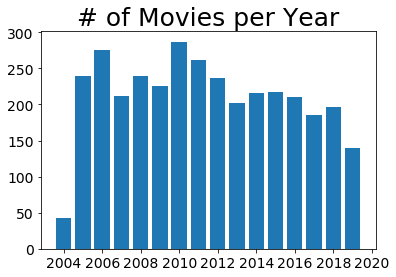

In [291]:
plt.bar(yeardist['Year'],yeardist['Movie_Title'])
plt.title('# of Movies per Year', fontsize = 25)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
#plt.figure(num=None, figsize=(15, 11), dpi=150, facecolor='w', edgecolor='k')
plt.savefig('NumofMovies.png')

In [21]:
plt.savefig('NumofMovies.png')

<Figure size 432x288 with 0 Axes>

In [22]:
dfRed[dfRed.duplicated()]

,Movie_Title,Distributor,Domestic_Total_Gross,Budget,Runtime(mins),Rating,Release_Date,Genre,strpdate,Year,CPMin,Month,Winter,Spring,Summer,Age
2,The Lion King,Walt Disney Studios Motion Pictures,543638043,260000000.0,118.000000,PG,2019-07-19,"Adventure, Animation, Drama, Family, Musical",2019-07-19,2019,2.203390e+06,7,0,0,1,1
9,Aladdin,Walt Disney Studios Motion Pictures,355559216,183000000.0,128.000000,PG,2019-05-24,"Adventure, Family, Fantasy, Musical, Romance",2019-05-24,2019,1.429688e+06,5,0,1,0,1
56,Pet Sematary,Paramount Pictures,54724696,21000000.0,101.000000,R,2019-04-05,"Horror, Mystery, Thriller",2019-04-05,2019,2.079208e+05,4,0,1,0,1
75,Little Women,Sony Pictures Releasing,87698881,40000000.0,135.000000,PG,2019-12-25,"Drama, Romance",2019-12-25,2019,2.962963e+05,12,0,0,0,1
101,Hellboy,Lionsgate,21903748,50000000.0,108.705988,R,2019-04-12,"Action, Adventure, Fantasy, Horror, Sci-Fi",2019-04-12,2019,4.100368e+05,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11063,The White Countess,Sony Pictures Classics,1669971,16000000.0,135.000000,None,2005-12-21,"Drama, History, Romance, War",2005-12-21,2005,1.185185e+05,12,0,0,0,15
11119,Mrs. Palfrey at the Claremont,Cineville,1720953,750000.0,108.000000,None,2005-11-25,"Comedy, Drama",2005-11-25,2005,6.944444e+03,11,0,0,0,15
11188,Three Burials,Sony Pictures Classics,5027684,15000000.0,121.000000,R,2005-12-14,"Adventure, Crime, Drama, Mystery, Western",2005-12-14,2005,1.239669e+05,12,0,0,0,15
11218,Dear Wendy,Wellspring Media,23106,8000000.0,105.000000,None,2005-09-23,"Comedy, Crime, Drama, Romance",2005-09-23,2005,7.619048e+04,9,0,0,1,15


In [23]:
dfdupes = dfRed.drop_duplicates().reset_index()

<BarContainer object of 16 artists>

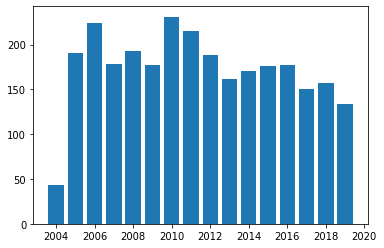

In [290]:
plt.bar(dfdupes.groupby(['Year']).Movie_Title.count().reset_index()['Year'],dfdupes.groupby(['Year']).Movie_Title.count().reset_index()['Movie_Title'])

In [288]:
dfdupes.groupby(['Year']).Movie_Title.count().reset_index()

,Year,Movie_Title
0,2004,43
1,2005,191
2,2006,224
3,2007,178
4,2008,193
5,2009,177
6,2010,231
7,2011,215
8,2012,188
9,2013,162


In [191]:
lr = LinearRegression()
lr.fit(dfdupes[['Budget']],dfdupes['Domestic_Total_Gross'])
lr.score(dfdupes[['Budget']],dfdupes['Domestic_Total_Gross'])

0.4912467279717313

In [192]:
lr = LinearRegression()
lr.fit(dfdupes[['Budget','Month']],dfdupes['Domestic_Total_Gross'])
lr.score(dfdupes[['Budget','Month']],dfdupes['Domestic_Total_Gross'])

0.49157418677930975

In [193]:
lr = LinearRegression()
lr.fit(dfdupes[['Budget','Month','Age']],dfdupes['Domestic_Total_Gross'])
lr.score(dfdupes[['Budget','Month','Age']],dfdupes['Domestic_Total_Gross'])

0.493181537966527

In [194]:
lr = LinearRegression()
lr.fit(dfdupes[['Budget','Month','Winter','Spring','Summer','Age']],dfdupes['Domestic_Total_Gross'])
lr.score(dfdupes[['Budget','Month','Winter','Spring','Summer','Age']],dfdupes['Domestic_Total_Gross'])

0.4936923929038598

In [195]:
lr = LinearRegression()
lr.fit(dfdupes[['Budget','Month','Winter','Spring','Summer',
                'CPMin','Age']],dfdupes['Domestic_Total_Gross'])
lr.score(dfdupes[['Budget','Month','Winter','Spring','Summer',
                'CPMin','Age']],dfdupes['Domestic_Total_Gross'])

0.49827358255052906

In [196]:
lr = LinearRegression()
lr.fit(dfdupes[['Budget','Month','CPMin','Runtime(mins)','Age']],dfdupes['Domestic_Total_Gross'])
lr.score(dfdupes[['Budget','Month','CPMin','Runtime(mins)','Age']],dfdupes['Domestic_Total_Gross'])

0.4983101058205496

In [197]:
lr = LinearRegression()
lr.fit(dfdupes[['Budget','Month','Winter','Spring','Summer',
                'CPMin','Runtime(mins)','Age']],dfdupes['Domestic_Total_Gross'])
lr.score(dfdupes[['Budget','Month','Winter','Spring','Summer',
                'CPMin','Runtime(mins)','Age']],dfdupes['Domestic_Total_Gross'])

0.49874751367502806

In [198]:
dfnums = dfdupes[['Budget','Month','Winter','Spring','Summer',
       'CPMin','Runtime(mins)','Age']]

In [199]:
lr = LinearRegression()
p = PolynomialFeatures(degree=2)
lr.fit(p.fit_transform(dfnums),dfdupes['Domestic_Total_Gross'])
lr.score(p.transform(dfnums),dfdupes['Domestic_Total_Gross'])

0.17662565957532383

In [34]:
dfcats = dfdupes.copy()

In [35]:
rating = pd.get_dummies(dfdupes['Rating'], drop_first=True)
dfcats = pd.concat([dfdupes,rating],sort=False,join='outer',axis = 1)

In [36]:
#dfcats.info()

In [37]:
dfcats.groupby(['Rating']).count()

,index,Movie_Title,Distributor,Domestic_Total_Gross,Budget,Runtime(mins),Release_Date,Genre,strpdate,Year,...,Month,Winter,Spring,Summer,Age,NC-17,Not Rated,PG,PG-13,R
Rating,,,,,,,,,,,,,,,,,,,,,
G,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
NC-17,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Not Rated,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PG,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,416
PG-13,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,...,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
R,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,...,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084


In [200]:
lr = LinearRegression()
lr.fit(dfcats[['Budget','Month','Winter','Spring','Summer','PG','PG-13','R',
                'CPMin','Runtime(mins)','Age']],dfdupes['Domestic_Total_Gross'])
lr.score(dfcats[['Budget','Month','Winter','Spring','Summer','PG','PG-13','R',
                'CPMin','Runtime(mins)','Age']],dfdupes['Domestic_Total_Gross'])

0.5077399323214209

In [39]:
#Creasted all Dummies for Dist.
dist = pd.get_dummies(dfcats['Distributor'], drop_first=True)
dfcats1 = pd.concat([dfcats,dist],sort=False,join='outer',axis = 1)

In [119]:
Glist = list(dfcats['Genre'].str.split(' ', expand=True).stack().unique())
Glist2 = []
for item in Glist:
    Glist2.append(item.strip(','))
Glistset = list(set(Glist2))
Glistset.sort()
len(Glistset)

23

In [120]:
funclist = [Action, Adventure, Animation, Biography, Comedy, 
            Crime, Documentary, Drama, Family, Fantasy, History,
            Horror, Music, Musical, Mystery, News, Romance, 
            SciFi, Short, Sport, Thriller, War, Western]

In [122]:
len(dfc)

2767

In [123]:
basecategories = dfcats.copy()

In [127]:
for i in range(len(Glistset)):
        dfcats1[Glistset[i]] = dfcats1['Genre'].apply(funclist[i])
dfcats1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Columns: 251 entries, index to Western
dtypes: datetime64[ns](2), float64(3), int64(31), object(4), uint8(211)
memory usage: 1.4+ MB


In [132]:
dfcats.count()

index                   2767
Movie_Title             2767
Distributor             2767
Domestic_Total_Gross    2767
Budget                  2767
Runtime(mins)           2767
Rating                  2528
Release_Date            2767
Genre                   2767
strpdate                2767
Year                    2767
CPMin                   2767
Month                   2767
Winter                  2767
Spring                  2767
Summer                  2767
Age                     2767
NC-17                   2767
Not Rated               2767
PG                      2767
PG-13                   2767
R                       2767
Action                  2767
Adventure               2767
Animation               2767
Biography               2767
Comedy                  2767
Crime                   2767
Documentary             2767
Drama                   2767
Family                  2767
Fantasy                 2767
History                 2767
Horror                  2767
Music         

In [128]:
#dfcats.groupby(['Distributor']).count().reset_index().sort_values('Movie_Title').tail(15)

In [284]:

lr = LinearRegression()
lr.fit(dfcats1[['Budget','Month','Winter','Spring','Summer','PG','PG-13','R',
                'Warner Bros.','Twentieth Century Fox','Universal Pictures',
                'Sony Pictures Releasing','Walt Disney Studios Motion Pictures',
                'Lionsgate','Paramount Pictures','Sony Pictures Classics',
                'Drama','Comedy','Thriller','Action','Adventure','Romance',
                'CPMin','Runtime(mins)','Age']],dfdupes['Domestic_Total_Gross'])
lr.score(dfcats1[['Budget','Month','Winter','Spring','Summer','PG','PG-13','R',
                'Warner Bros.','Twentieth Century Fox','Universal Pictures',
                'Sony Pictures Releasing','Walt Disney Studios Motion Pictures',
                'Lionsgate','Paramount Pictures','Sony Pictures Classics',
                'Drama','Comedy','Thriller','Action','Adventure','Romance',
                'CPMin','Runtime(mins)','Age']],dfdupes['Domestic_Total_Gross'])

0.5022925980754136

In [133]:
lr.coef_

array([ 1.48703029e+00,  1.17155718e+06,  1.28220241e+07,  1.27150709e+07,
        4.83399098e+06,  2.43367676e+07,  2.51658563e+07,  1.93105311e+07,
        5.59085648e+06,  1.53255986e+07,  2.31400750e+07,  1.46212217e+07,
        6.16669649e+07,  7.79486110e+06,  5.01387038e+06, -5.41327930e+06,
       -1.11351397e+07,  4.85857172e+06, -3.34548568e+05, -9.75350633e+06,
        1.82683487e+06, -3.39248720e+06, -6.76665520e+01,  9.07282473e+04,
       -7.56887672e+05])

In [134]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
dfc = dfcats1.select_dtypes(include=numerics).drop('Domestic_Total_Gross',axis = 1)

In [171]:
dfc.drop(list(droppable['Feature']),axis=1,inplace=True)

In [172]:
dfc

,index,Budget,Runtime(mins),Year,CPMin,Month,Spring,Summer,Age,PG,...,Fantasy,History,Horror,Musical,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,356000000.0,181.0,2019,1.966851e+06,4,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,260000000.0,118.0,2019,2.203390e+06,7,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,3,200000000.0,100.0,2019,2.000000e+06,6,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,4,150000000.0,103.0,2019,1.456311e+06,11,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,5,175000000.0,123.0,2019,1.422764e+06,3,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,11265,300000.0,109.0,2005,2.752294e+03,5,1,0,15,0,...,0,0,0,0,1,0,1,0,0,0
2763,11309,3000000.0,80.0,2005,3.750000e+04,9,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0
2764,11320,1600000.0,111.0,2005,1.441441e+04,11,0,0,15,0,...,0,0,0,0,0,0,0,0,0,0
2765,11332,30000000.0,90.0,2005,3.333333e+05,9,0,1,15,0,...,0,0,0,0,1,0,0,0,0,0


In [102]:
#dfc.drop('index',axis=1,inplace=True)

In [46]:
#dfc = dfcats1.drop('Domestic_Total_Gross',axis=1)
#dfc.drop(['Movie_Title','Distributor','Rating','Genre','strpdate','Year'],axis=1,inplace=True)

In [151]:
#droppable.head(40)

In [204]:
len(dfc.columns)

46

In [211]:
lr = LinearRegression()
lr.fit(dfc,dfdupes['Domestic_Total_Gross'])
lr.score(dfc,dfdupes['Domestic_Total_Gross'])

0.5776911975634142

In [209]:
ridge_model = Ridge(alpha = .1)
ridge_model.fit(dfc, dfdupes['Domestic_Total_Gross'])
ridge_model.score(dfc, dfdupes['Domestic_Total_Gross'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.36277e-20): result may not be accurate.
  overwrite_a=True).T


0.5776908693340292

In [282]:
lasso_model = Lasso(alpha = .1)
lasso_model.fit(dfc, dfdupes['Domestic_Total_Gross'])
lasso_model.score(dfc, dfdupes['Domestic_Total_Gross'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.95593156275642e+18, tolerance: 1873478052741435.0
  positive)


0.5776911949427685

In [250]:
lasso_model.coef_

array([-3.69826137e+04,  1.53327190e+00,  1.01821551e+05, -2.74210973e+07,
       -7.95166193e+01, -1.81247792e+06,  9.54212732e+06,  8.58533982e+06,
       -5.01826418e+05,  1.63812664e+07,  1.57141075e+07,  1.08296502e+07,
       -3.08660664e+07,  3.58972162e+07, -2.99632764e+07, -3.21819000e+07,
        7.11521033e+06,  1.47420649e+07, -8.64507253e+06,  1.22680851e+07,
        3.30143275e+07,  2.54654783e+07,  1.25281559e+07,  2.24718059e+07,
        5.93088939e+07,  4.73372828e+06, -2.09379650e+07, -2.36109991e+07,
       -8.23416245e+06,  2.58458501e+07, -4.47894052e+06, -4.97686341e+05,
       -1.25050080e+06, -7.27663659e+06, -9.39492311e+06, -5.72529195e+06,
       -1.59421933e+07, -1.52427050e+07,  3.50511039e+06, -9.62710516e+06,
       -2.96911200e+06,  4.37287539e+06, -1.36370833e+07, -6.25534739e+06,
       -1.25328758e+07, -1.84591085e+07])

In [251]:
df_coef = pd.DataFrame({'Feature':dfc.columns, 'Coef':lasso_model.coef_})

In [184]:
df_coef['Coef'] = abs(df_coef['Coef'])
Usable = df_coef.sort_values(['Coef'])#.head(132)

In [252]:
df_coef#.drop(0)

,Feature,Coef
0,index,-3.698261e+04
1,Budget,1.533272e+00
2,Runtime(mins),1.018216e+05
3,Year,-2.742110e+07
4,CPMin,-7.951662e+01
5,Month,-1.812478e+06
6,Spring,9.542127e+06
7,Summer,8.585340e+06
8,Age,-5.018264e+05
9,PG,1.638127e+07


In [185]:
Usable.to_csv('UsedFeatures.csv')

In [170]:
#droppable = df_coef.sort_values(['Coef']).head(91)
#df_coef.sort_values(['Coef']).head(91)

In [183]:
list(dfc.columns)

['index',
 'Budget',
 'Runtime(mins)',
 'Year',
 'CPMin',
 'Month',
 'Spring',
 'Summer',
 'Age',
 'PG',
 'PG-13',
 'R',
 'Dimension Films',
 'DreamWorks',
 'Entertainment Studios Motion Pictures',
 'Fathom Events',
 'Lionsgate',
 'Screen Gems',
 'Sony Pictures Classics',
 'Sony Pictures Releasing',
 'Summit Entertainment',
 'TriStar Pictures',
 'Twentieth Century Fox',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictures',
 'Warner Bros.',
 'Warner Independent Pictures (WIP)',
 'Well Go USA Entertainment',
 'Action',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Musical',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [91]:
#droppable = df_coef.sort_values(['Coef']).head(132)

In [94]:
#type(list(droppable['Feature']))

list

In [177]:
alphavec = 10**np.linspace(0,10,1000)#np.linspace(9000,10000,2000)#
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(dfc, dfdupes['Domestic_Total_Gross'])
lasso_model.alpha_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942949760520192.0, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4587656660770816.0, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4817679659590656.0, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.058697943092229e+17, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.93151017306006e+17, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8252413614574387e+17, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2903056437858304.0, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2888205180544000.0, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2865884679116288.0, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.224461233563238e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.219325652337664e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.212497827292518e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.023460432926259e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.998258790652621e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0654683935529984e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.927963438702387e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1352090086498816e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.971751097321779e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1659750939227136e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4646069530264064e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.300796720219341e+16, tolerance: 1095666040395757.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.816663803608561e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9490044193058063e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9494447411116493e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.717132803145125e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.898450318222064e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9362409065927086e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.000357205472896e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.999083219274483e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.997830341030037e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.894711711149839e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.894389004034318e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.89408420520343e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.992890755585717e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.992808541549793e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9927143810601134e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9941298302444237e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9940711609556193e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9939937280988047e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9942118080609766e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.993501804423003e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9933017903682596e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.991623702969717e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.991483575663829e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.993088172185852e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.995878417943462e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9918207480274596e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.995776411388243e+18, tolerance: 1526792873290422.8
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.533911956920875e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5340334740990643e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.533828071447649e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.812746016738962e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8095359391495895e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.806351454076048e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0684634585894164e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0671164277940777e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.065792946028608e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0048575106701097e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.004538980193252e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.004225885516951e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.993261349860983e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9931966235262167e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.99314014948049e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9910717584253624e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.99105429635486e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.991035077733473e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9906982218165806e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.990530651242963e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9907121134348744e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.990449587291006e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.990854673804404e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9902824530753096e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.989711659370667e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9871995701063634e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.988095758858528e+18, tolerance: 1549906217381745.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2145552822565888e+16, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5212874533100134e+17, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.531704763429366e+17, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.361378125071486e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.361056853249945e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3595806864000353e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2345381160639616e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2334954086310374e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.232471140239057e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1943273755739505e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.194097542394605e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.19387275764305e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1858896973546163e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.185798304170327e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1857746870835594e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1842585761249444e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1843721116025446e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.184313678329295e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.183844338898037e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1843044305815885e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.18464383730565e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1806465971698125e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.184699933729962e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.185227026302535e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1812291281583805e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1709262799188547e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1728405130030454e+18, tolerance: 1614712187696002.2
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6756543654701056e+16, tolerance: 1694875697200419.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8468479255341056e+16, tolerance: 1694875697200419.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8899627111168e+16, tolerance: 1694875697200419.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.871869409264333e+16, tolerance: 1694875697200419.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9664070513374208e+17, tolerance: 1694875697200419.5
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.955933128588813e+18, tolerance: 1873478052741435.0
  positive)


1.0

In [51]:
#lasso_model.alpha_

In [52]:
#lasso_model.coef_

In [53]:
#results = sm.OLS(dfdupes['Domestic_Total_Gross'],dfc).fit()

In [54]:
#results.summary()

In [55]:
#dfc.info()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(dfc, dfdupes['Domestic_Total_Gross'], test_size=0.2, random_state=42)

In [57]:
lasso_model = Lasso(alpha = .1)
lasso_model.fit(X_train, y_train)
lasso_model.score(X_test, y_test)

0.555651762470355

In [246]:
df_coef = pd.DataFrame({'Feature':X_train.columns, 'Coef':lasso_model.coef_})

In [59]:
df_coef['Coef'] = abs(df_coef['Coef'])
df_coef.sort_values(['Coef']).tail(23)

,Feature,Coef
39,Bullz Eye Productions,2.270590e+07
208,Vertical Entertainment,2.360685e+07
46,Cineville,2.361795e+07
92,Gorilla Factory Productions,2.399075e+07
48,Clarius Entertainment,2.454771e+07
159,Revolution Studios,2.509810e+07
99,Idle Wild Films,2.591743e+07
211,Vivendi Entertainment,2.681622e+07
62,Entertainment One,2.799395e+07
162,Rockstone Releasing,2.924105e+07


In [224]:
X_train, X_test, y_train, y_test = train_test_split(dfc, dfdupes['Domestic_Total_Gross'], test_size=0.2)

In [225]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [226]:
predictions[0:5]

array([2.72892786e+08, 2.28117202e+07, 3.50582880e+07, 6.48274163e+06,
       6.09506517e+06])

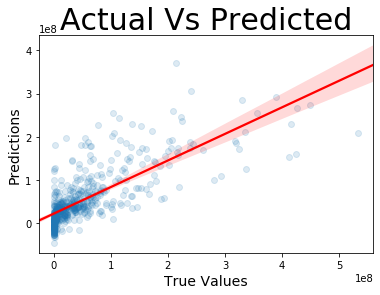

In [280]:
#sns.stripplot(y_test, predictions, alpha = .2,color='b')

#plt.figure(num=None, figsize=(15, 15))
#
sns.regplot(y_test, predictions,line_kws={'color':'red'},scatter_kws={'alpha':0.15})
plt.xlabel("True Values",fontsize = 14)
plt.ylabel("Predictions",fontsize = 14)
plt.title("Actual Vs Predicted", fontsize = 30)



plt.savefig('avp.png')



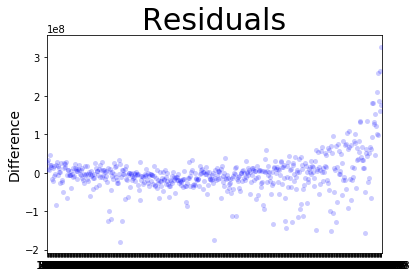

In [281]:
sns.stripplot(y_test, y_test-predictions, alpha = .2,color='b')
#plt.figure(num=None, figsize=(15, 15))
#sns.regplot(y_test, predictions-y_test,line_kws={'color':'red'},scatter_kws={'alpha':0.15})
plt.xlabel("",fontsize = 14)
plt.ylabel("Difference",fontsize = 14)
plt.title("Residuals", fontsize = 30)

plt.savefig('residuals.png')

In [239]:
model.score(X_test, y_test)

0.5649512841760923

In [240]:
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [241]:
from sklearn.model_selection import KFold

In [242]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, dfc, dfdupes['Domestic_Total_Gross'], # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.51389995, 0.5793056 , 0.46316892, 0.59087095, 0.4567776 ])

In [243]:

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, dfc, dfdupes['Domestic_Total_Gross'], cv=kf, scoring='r2')

array([0.57194427, 0.57630507, 0.51561471, 0.54235688, 0.54530998])

In [244]:
#kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

#print(np.mean(cross_val_score(lm, dfc, dfdupes['Domestic_Total_Gross'], cv=kf, scoring='r2')))
#print(np.mean(cross_val_score(lm_reg, dfc, dfdupes['Domestic_Total_Gross'], cv=kf, scoring='r2')))

0.5444056880846868


NameError: name 'lm_reg' is not defined

In [ ]:
#from sklearn.model_selection import KFold # import KFold
#X = dfc # create an array
#y = dfdupes['Domestic_Total_Gross'] # Create another array
#kf = KFold(n_splits=2) # Define the split - into 2 folds 
#kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
#print(kf) 

In [ ]:
#for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [ ]:
#droppable = df_coef.sort_values(['Coef']).head(23)

In [ ]:
#list(droppable['Feature'])

In [ ]:
#np.linalg.norm(y_train - lasso_model.predict(X_train)) ** 2

In [ ]:
#plt.scatter(y_test,lasso_model.predict(X_test))

In [ ]:
#lr = LinearRegression()
#lr.fit(X_train, y_train)
#lr.score(X_train, y_train)

In [ ]:
#stats.probplot(lr.predict(X_train), dist="norm", plot=pylab)
#pylab.show()

In [ ]:
#lr.score(X_test, y_test)

In [ ]:
#dfc.sample(5,random_state=0)

In [ ]:
#dfdupes['Domestic_Total_Gross'].sample(5,random_state=0)

In [ ]:
#pd.DataFrame(columns=list(dfc.columns)).drop('index',axis=1)

In [ ]:
#list(dfc.columns)

In [ ]:
#sample_features = []#pd.DataFrame(columns=list(dfc.columns)).drop('index',axis=1)
#sample_gross = []#pd.DataFrame(columns=['Domestic_Total_Gross'])
#for i in range(0,1500):
#    sample_features.append(dfc.sample(10,random_state=i).mean())#,ignore_index = True)
#    sample_gross.append((dfdupes['Domestic_Total_Gross'].sample(10,random_state=i).mean()))

In [ ]:
#asdf = pd.DataFrame(columns=list(dfc.columns))#.drop('index',axis=1)
#for i in range(0,1500):
#    asdf = asdf.append([sample_features[i]], sort=False)
#Features = asdf.reset_index().drop(['index'],axis=1)

In [ ]:
#sample_gross[0]

In [245]:
#Features

NameError: name 'Features' is not defined

In [ ]:
#lr = LinearRegression()
#lr.fit(Features, sample_gross)
#lr.score(Features, sample_gross)

In [ ]:
#plt.scatter(sample_gross,lr.predict(Features))

In [ ]:
#import pylab 
#import scipy.stats as stats
#stats.probplot(lr.predict(Features), dist="norm", plot=pylab)
#pylab.show()

In [ ]:
#asdf#.append([sample_features[2]])

In [ ]:
#dfc

In [ ]:
#asdf = pd.DataFrame(columns=list(dfc.columns))
#asdf.append(sample_features[4],ignore_index=True)

In [ ]:
#asdf = pd.concat([asdf,sample_features[2]],axis=0,join = 'outer')
#asdf